In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cd /content/drive/'My Drive'/fingerprint_data && ls

X_test.npy  X_train.npy  Y_test.npy  Y_train.npy


In [0]:
import numpy as np
X_train=np.load("/content/drive/My Drive/fingerprint_data/X_train.npy")
Y_train=np.load("/content/drive/My Drive/fingerprint_data/Y_train.npy")
X_test=np.load("/content/drive/My Drive/fingerprint_data/X_test.npy")
Y_test=np.load("/content/drive/My Drive/fingerprint_data/Y_test.npy")

In [0]:
labels=[]
for i in range(Y_train.shape[0]-1):
  for k in range(5):
    if Y_train[i][k]==1:
      j=k
      break
  labels.append(j)






  
  
  
  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


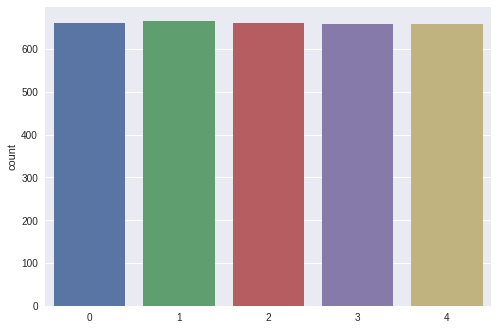

In [0]:
import seaborn as sns
sns.countplot(labels)

In [0]:
import matplotlib.pyplot as plt

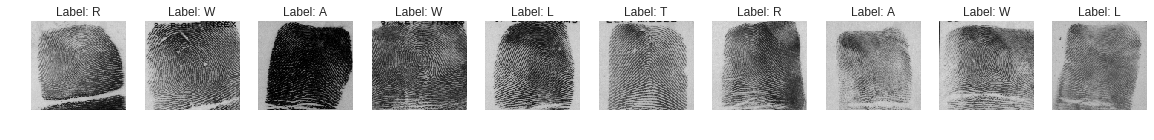

In [0]:
figsize=(20,10)
columns=10
classes=['A','L','R','T','W']
f=plt.figure(figsize=figsize)

for i in range(10):
    
    a=f.add_subplot(1,10,i+1)
    a.imshow(X_test[i])
    
    a.axis('off')
    for k in range(Y_test[i].shape[0]):
        if Y_test[i][k]==1:
            j=k
            break
    title='Label: '+str(classes[j])
    plt.title(title)

In [0]:
import keras

Using TensorFlow backend.


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras import backend as K

In [0]:
vgg_model=keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(128,128,3), pooling='max', classes=5)

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [0]:
pt_model=keras.models.Sequential()
pt_model.add(vgg_model)
pt_model.add(Dense(512,activation='relu'))
pt_model.add(Dropout(0.25))
pt_model.add(Dense(256,activation='relu'))
pt_model.add(Dropout(0.25))
pt_model.add(Dense(128,activation='relu'))
pt_model.add(Dropout(0.25))
pt_model.add(Dense(5,activation='softmax'))



In [0]:
adam=keras.optimizers.Adam(lr=0.0001,decay=1e-6)
pt_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
metrics=['accuracy'])

In [0]:
history=pt_model.fit(X_train, Y_train,
          batch_size=64,
          epochs=60,
          verbose=1,
validation_data=(X_test, Y_test))


Train on 3300 samples, validate on 700 samples
Epoch 1/60
3300/3300 [==============================] - 36s 11ms/step - loss: 1.6386 - acc: 0.1994 - val_loss: 1.6028 - val_acc: 0.2157
Epoch 2/60
3300/3300 [==============================] - 30s 9ms/step - loss: 1.6105 - acc: 0.2167 - val_loss: 1.4993 - val_acc: 0.3214
Epoch 3/60
3300/3300 [==============================] - 30s 9ms/step - loss: 1.2222 - acc: 0.4655 - val_loss: 0.6897 - val_acc: 0.7043
Epoch 4/60
3300/3300 [==============================] - 30s 9ms/step - loss: 0.6812 - acc: 0.7321 - val_loss: 0.5210 - val_acc: 0.7843
Epoch 5/60
3300/3300 [==============================] - 30s 9ms/step - loss: 0.5026 - acc: 0.8142 - val_loss: 0.5053 - val_acc: 0.8100
Epoch 6/60
3300/3300 [==============================] - 30s 9ms/step - loss: 0.4460 - acc: 0.8385 - val_loss: 0.3494 - val_acc: 0.8686
Epoch 7/60
3300/3300 [==============================] - 30s 9ms/step - loss: 0.4015 - acc: 0.8618 - val_loss: 0.4553 - val_acc: 0.8386
Epoch 8

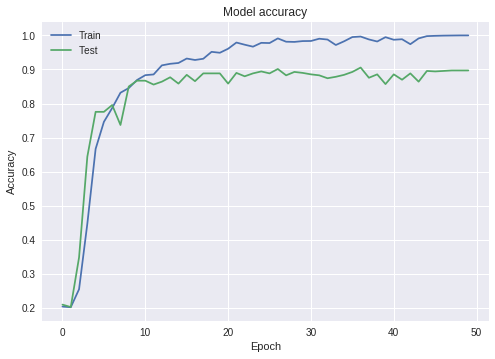

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

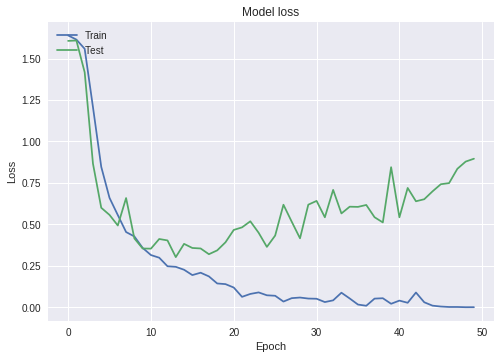

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
t_labels=[]
for i in range(Y_test.shape[0]):
  for k in range(5):
    if Y_test[i][k]==1:
      j=k
      break
  t_labels.append(j) 

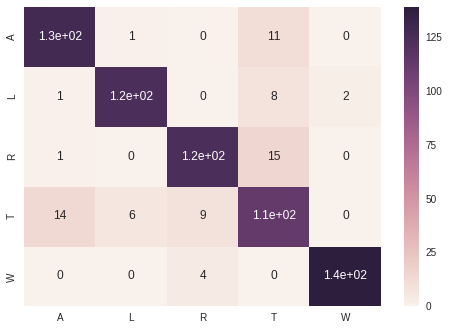

In [0]:
import pandas as pd
from sklearn import metrics
classes=['A','L','R','T','W']
preds=pt_model.predict_classes(X_test)
cm=metrics.confusion_matrix(t_labels,preds)
df=pd.DataFrame(cm,index=(i for i in classes),columns=(i for i in classes))
sns.heatmap(df,annot=True)

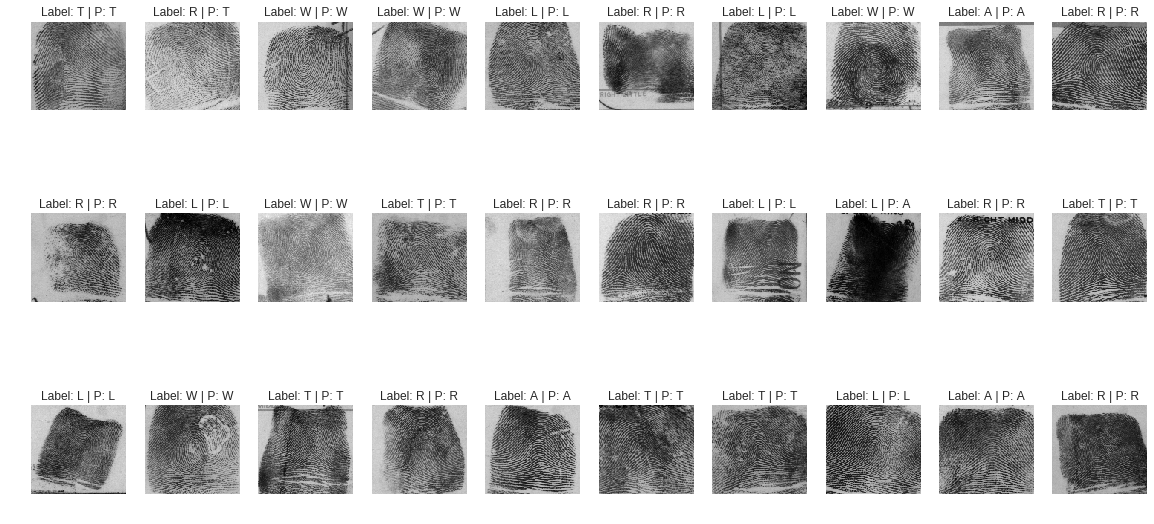

In [0]:
figsize=(20,10)
columns=10
classes=['A','L','R','T','W']
f=plt.figure(figsize=figsize)
c=0
for i in range(40,70):
    
    a=f.add_subplot(3,10,c+1)
    a.imshow(X_test[i])
    
    a.axis('off')
    for k in range(Y_test[i].shape[0]):
        if Y_test[i][k]==1:
            j=k
            break
    title='Label: '+str(classes[j])
    plt.title(title+ ' | P: '+classes[preds[i]])
    c+=1